# Flights vs. Weather Project

## Setting up environment

### Copy .env and sql_functions from previous notebooks

In [1]:
# ! cp /Users/danielschuster/neuefische/Git/forked-da-external-data-sourcing/.env .
# ! cp /Users/danielschuster/neuefische/Git/forked-da-external-data-sourcing/sql_functions.py .

## TASK 1: Historical Weather Event --> Hurricane Katrina, August 23, 2005

### Connect to Meteostat API

In [4]:
# weather_katrina_df = pd.json_normalize(weather_katrina, 
#                                        sep="_", 
#                                        record_path="data", 
#                                     #    meta=[["meta", "generated"], 
#                                     #          ["meta", "stations"]],
#                                        record_prefix="data_",
#                                        errors='ignore')
# weather_katrina_df.head()

### OTHER AIRPORTS FOR DATAFRAMES

* New Orleans, Ln, MSY --> done
* Baton Rouge, La, BTR --> Daniel
* Biloxi, Miss, GPT --> Daniel
* Mobile, Ala, MOB --> Juls
* Pensacola, Fla, PNS --> Juls
* Eglin Air Force Base, Fla, VPS --> Juls

# Getting Weather Data near MSY, BTR and GPT airports during Katrina using get_weather_data.get_katrina_weather_data()

### BTR (Baton Rouge, La)

<AxesSubplot:>

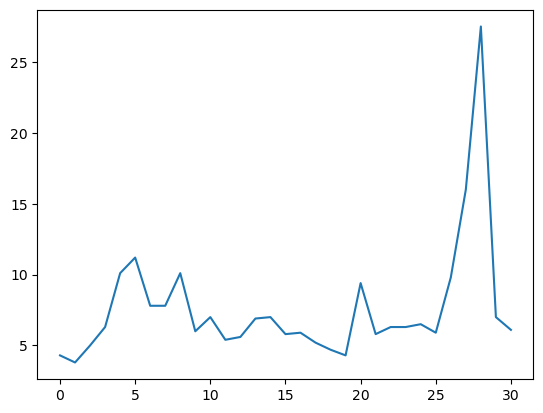

In [1]:
from get_weather_data import get_katrina_weather_data as get_kat_data

btr_data = get_kat_data('30.53236', '-91.151461')
btr_data.head()

btr_data['wspd'].plot()

### GPT (Biloxi, Miss)

In [2]:
gpt_data = get_kat_data('30.413366', '-89.072955')
gpt_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2005-08-01,25.8,23.3,31.1,22.9,0.0,NaN,4.0,None,1016.1,None
1,2005-08-02,NaN,23.3,30.6,0.8,0.0,NaN,5.4,None,NaN,None
2,2005-08-03,25.1,21.7,31.1,10.4,0.0,NaN,9.0,None,NaN,None
3,2005-08-04,24.3,22.2,30.6,25.7,0.0,NaN,7.2,None,NaN,None
4,2005-08-05,26.2,21.7,31.7,0.0,0.0,NaN,10.1,None,1016.9,None


### MSY (New Orleans, Ln)

In [3]:
msy_data = get_kat_data('29.9893', '-90.2548')
msy_data.head()

msy_data[msy_data['wspd'] == 27.7]

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
27,2005-08-28,28.9,26.1,32.8,16.5,0.0,54.0,27.7,None,1004.6,None


# Basic Data Cleaning

Dropping 'dwpt', 'rhum', 'wdir', 'snow', 'tsun', 'wpgt', 'coco' and 'prcp' either because information is not valuable or all values are "None"

In [4]:
from get_weather_data import clean_daily_data

msy_clean = clean_daily_data(msy_data, 'MSY')
msy_clean.head()

,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,27.9,4.3,1016.4,MSY
1,2005-08-02,27.0,5.8,1015.9,MSY
2,2005-08-03,27.9,7.6,1015.1,MSY
3,2005-08-04,26.6,8.3,1016.7,MSY
4,2005-08-05,27.0,10.1,1017.6,MSY


In [5]:
btr_clean = clean_daily_data(btr_data, 'BTR')
btr_clean.head()

,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,27.9,4.3,1016.4,BTR
1,2005-08-02,28.1,3.8,1015.5,BTR
2,2005-08-03,27.3,5.0,1014.8,BTR
3,2005-08-04,26.1,6.3,1016.4,BTR
4,2005-08-05,27.0,10.1,1017.6,BTR


<AxesSubplot:>

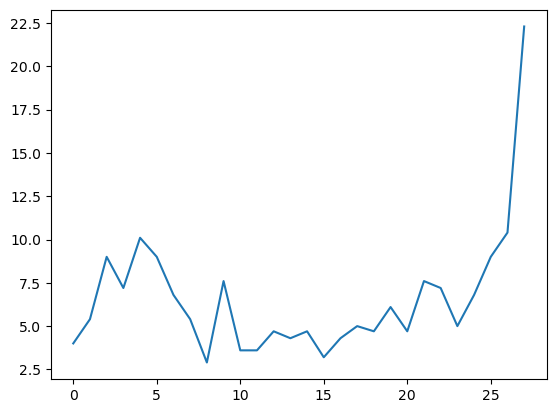

In [6]:
gpt_clean = clean_daily_data(gpt_data, 'GPT')
gpt_clean.head()

gpt_clean['wind_speed_kph'].plot()

In [8]:
from sql_functions import get_engine
from sql_functions import push_to_database
import psycopg2

schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'group_1_weather'                                                                                     #'Group_1_Weather_MSY'

push_to_database(df=msy_clean, table_name=table_name, engine=engine, schema=schema)

NameError: name 'psycopg2' is not defined

In [9]:
schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'Group_1_Weather_GPT'

push_to_database(df=gpt_clean, table_name=table_name, engine=engine, schema=schema)

The Group_1_Weather_GPT table was imported successfully.


In [10]:
schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'Group_1_Weather_BTR'

push_to_database(df=btr_clean, table_name=table_name, engine=engine, schema=schema)

The Group_1_Weather_BTR table was imported successfully.


In [11]:
import pandas as pd

df_all = pd.concat([msy_clean, btr_clean, gpt_clean], axis=0)
df_all.sort_values('date')



,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,27.9,4.3,1016.4,MSY
0,2005-08-01,25.8,4.0,1016.1,GPT
0,2005-08-01,27.9,4.3,1016.4,BTR
1,2005-08-02,27.0,5.8,1015.9,MSY
1,2005-08-02,NaN,5.4,NaN,GPT
...,...,...,...,...,...
29,2005-08-30,NaN,NaN,NaN,MSY
29,2005-08-30,NaN,NaN,NaN,GPT
30,2005-08-31,28.9,6.1,1010.7,BTR
30,2005-08-31,NaN,6.1,NaN,MSY


In [12]:
from sql_functions import get_dataframe

schema = 'cgn_analytics_22_3'
df_all = get_dataframe(f'SELECT * FROM {schema}.group_1_weather;')

df_all.head()

,date,avg_temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
0,2005-08-01,25.7,5.8,1016.7,VPS
1,2005-08-02,24.9,5.8,1016.0,VPS
2,2005-08-03,25.2,6.5,1015.6,VPS
3,2005-08-04,24.9,7.5,1017.0,VPS
4,2005-08-05,23.1,7.5,1017.6,VPS


In [13]:
vps_data= []
pns_data= []
mob_data= []

In [14]:
df_all = pd.concat([vps_data, pns_data, mob_data, gpt_data, btr_data, msy_data], axis=0)
df_all

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

# Viewing hourly data to check for number of null values

# MSY

In [1]:
from get_weather_data import clean_hourly_data
#import matplotlib.pyplot as plt

msy_hourly = get_kat_data('29.9893', '-90.2548', 'hourly')

msy_hourly_clean = clean_hourly_data(msy_hourly, 'MSY')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
msy_hourly_clean.wind_speed_kph.plot()

#plt.plot(msy_hourly_clean.date, msy_hourly_clean.wind_speed_kph)
#plt.xticks

NameError: name 'get_kat_data' is not defined

# VPS

<AxesSubplot:>

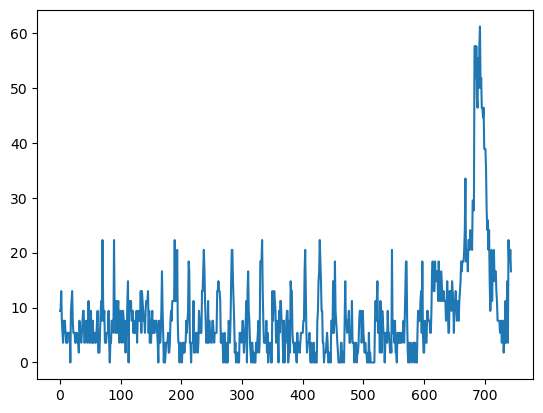

In [163]:
vps_hourly = get_kat_data('30.495438', '-86.549817', 'hourly')

vps_hourly_clean = clean_hourly_data(vps_hourly, 'VPS')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
vps_hourly_clean.wind_speed_kph.plot()

# BTR

,date,temp_celsius,dwpt,rhum,prcp,snow,wdir,wind_speed_kph,wpgt,air_pressure_hPa,tsun,coco,airport_code
0,2005-08-01 00:00:00,31.2,20.8,54.0,0.0,None,50.0,20.5,None,1014.4,None,None,BTR
1,2005-08-01 01:00:00,29.5,21.2,61.0,0.0,None,90.0,13.0,None,1015.0,None,None,BTR
2,2005-08-01 02:00:00,26.2,20.8,72.0,0.0,None,180.0,14.8,None,1016.1,None,None,BTR
3,2005-08-01 03:00:00,26.2,20.8,72.0,0.0,None,280.0,0.0,None,1015.8,None,None,BTR
4,2005-08-01 04:00:00,26.8,20.6,69.0,0.0,None,NaN,0.0,None,1015.9,None,None,BTR


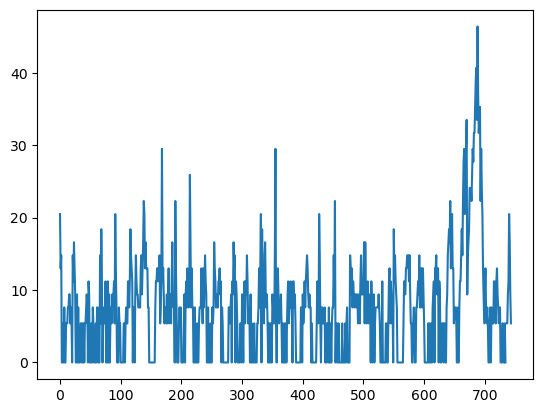

In [164]:
btr_hourly = get_kat_data('30.53236', '-91.151461', 'hourly')

btr_hourly_clean = clean_hourly_data(btr_hourly, 'BTR')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
btr_hourly_clean.wind_speed_kph.plot()
btr_hourly_clean.head()

# GPT

<AxesSubplot:>

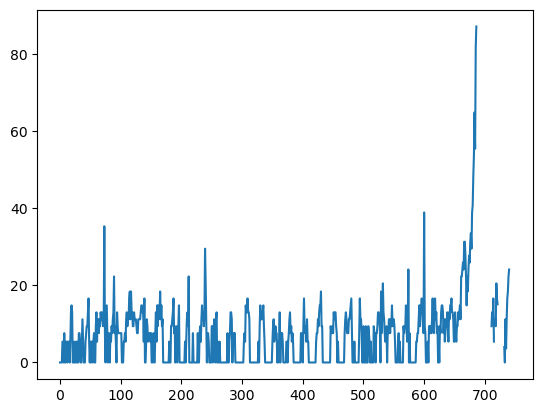

In [165]:
gpt_hourly = get_kat_data('30.413366', '-89.072955', 'hourly')

gpt_hourly_clean = clean_hourly_data(gpt_hourly, 'GPT')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
gpt_hourly_clean.wind_speed_kph.plot()

# MOB

,date,temp_celsius,dwpt,rhum,prcp,snow,wdir,wind_speed_kph,wpgt,air_pressure_hPa,tsun,coco,airport_code
739,2005-08-31 19:00:00,31.5,25.4,70.0,0.0,None,200.0,9.4,None,1011.3,None,None,MOB
740,2005-08-31 20:00:00,26.0,23.3,85.0,0.0,None,20.0,18.4,None,1010.9,None,None,MOB
741,2005-08-31 21:00:00,27.6,22.6,74.0,0.0,None,90.0,14.8,None,1011.9,None,None,MOB
742,2005-08-31 22:00:00,27.6,22.6,74.0,0.0,None,310.0,14.8,None,1011.6,None,None,MOB
743,2005-08-31 23:00:00,28.7,23.2,72.0,0.0,None,50.0,9.4,None,1011.3,None,None,MOB


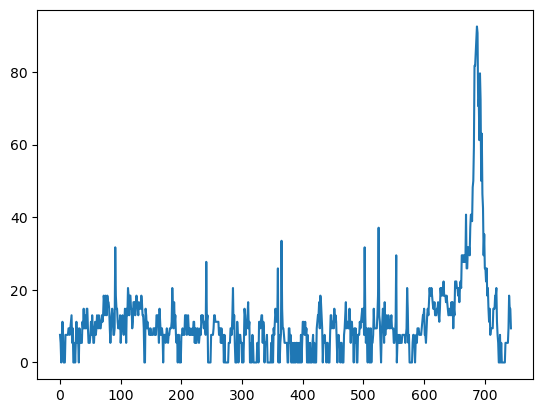

In [199]:
mob_hourly = get_kat_data('30.6882', '-88.2390', 'hourly')

mob_hourly_clean = clean_hourly_data(mob_hourly, 'MOB')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
mob_hourly_clean.wind_speed_kph.plot()
mob_hourly_clean.tail()

# PNS

739    2005-08-31 19:00:00
740    2005-08-31 20:00:00
741    2005-08-31 21:00:00
742    2005-08-31 22:00:00
743    2005-08-31 23:00:00
Name: date, dtype: object

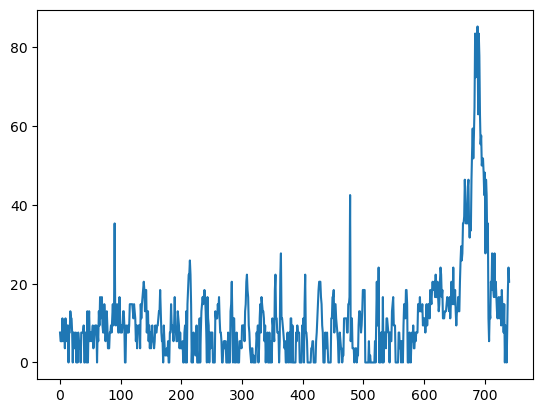

In [167]:
pns_hourly = get_kat_data('30.473816', '-87.186705', 'hourly')

pns_hourly_clean = clean_hourly_data(pns_hourly, 'PNS')

# msy_hourly_clean.wind_speed_kph.sort_values(ascending=False)
pns_hourly_clean.wind_speed_kph.plot()
pns_hourly_clean.date.tail()

# Concat all hourly data

In [171]:
# msy_hourly_clean.airport_code.unique()
df_all = pd.concat([msy_hourly_clean, btr_hourly_clean, gpt_hourly_clean, mob_hourly_clean, pns_hourly_clean, vps_hourly_clean], axis=0)
df_all.airport_code.unique()


df_weather = df_all.drop(columns=['dwpt', 'rhum', 'wdir', 'snow', 'tsun', 'wpgt', 'coco', 'prcp'])
df_weather.date.tolist()[0]

df_weather.airport_code.unique()



array(['MSY', 'BTR', 'GPT', 'MOB', 'PNS', 'VPS'], dtype=object)

In [172]:
weather_dates=[]
for i in df_weather.date.tolist():
    weather_dates.append(i.split()[0])

weather_dates

df_weather.date = weather_dates
# df_weather.date = ([i].split() for i in df_weather.date.tolist())   #df_weather.date.tolist().split()[0]
# df_weather.head()

In [173]:
df_weather.airport_code.unique()

array(['MSY', 'BTR', 'GPT', 'MOB', 'PNS', 'VPS'], dtype=object)

# Push all hourly data to SQL database

In [174]:
from sql_functions import get_engine
from sql_functions import push_to_database
import psycopg2

schema = 'cgn_analytics_22_3'
engine = get_engine()
table_name = 'group_1_weather_hourly'                                                                                     

push_to_database(df=df_weather, table_name=table_name, engine=engine, schema=schema)

The group_1_weather_hourly table was imported successfully.


# Push individual weather data

### MSY

In [45]:
table_name = 'group_1_msy_hourly'
push_to_database(df=msy_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_msy_hourly table was imported successfully.


### BTR

In [46]:
table_name = 'group_1_btr_hourly'
push_to_database(df=btr_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_btr_hourly table was imported successfully.


### GPT

In [47]:
table_name = 'group_1_gpt_hourly'
push_to_database(df=gpt_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_gpt_hourly table was imported successfully.


### MOB

In [48]:
table_name = 'group_1_mob_hourly'
push_to_database(df=mob_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_mob_hourly table was imported successfully.


### PNS

In [49]:
table_name = 'group_1_pns_hourly'
push_to_database(df=pns_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_pns_hourly table was imported successfully.


### VPS

In [50]:
table_name = 'group_1_vps_hourly'
push_to_database(df=vps_hourly, table_name=table_name, engine=engine, schema=schema)

The group_1_vps_hourly table was imported successfully.


# Join flight data and weather data

In [57]:
df_flights = get_dataframe(f"SELECT * FROM {schema}.flights_katrina")

In [61]:
display(df_flights.flight_date.max(),
        df_weather.date.max())

Timestamp('2005-08-31 00:00:00')

'2005-08-31 23:00:00'

In [63]:
df_flights.flight_date = df_flights.flight_date.astype(str)

In [ ]:
df_merged = df_flights.merge(df_weather, left_on='flight_date', right_on='date', how='outer')

df_merged.head(30)

In [210]:
df_flights.rename(columns={'flight_date' : 'date'}, inplace=True)
df_weather.date = df_weather.date.tolist()[0].split()[0]

df_weather.date.head()
# df_flights.columns

df_joined = df_flights.set_index('date').join(df_weather.set_index('date'), how='inner')

df_joined.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted,temp_celsius,wind_speed_kph,air_pressure_hPa,airport_code
date,,,,,,,,,,,,,,,,,,,,
2005-08-01,2250.0,2141,69.0,2255.0,2201,54.0,EV,N932EV,4169,ATL,GPT,54.0,65.0,352.0,0,0,28.9,9.4,1015.1,MSY
2005-08-01,2250.0,2141,69.0,2255.0,2201,54.0,EV,N932EV,4169,ATL,GPT,54.0,65.0,352.0,0,0,28.3,5.4,1015.8,MSY
2005-08-01,2250.0,2141,69.0,2255.0,2201,54.0,EV,N932EV,4169,ATL,GPT,54.0,65.0,352.0,0,0,28.3,0.0,1016.1,MSY
2005-08-01,2250.0,2141,69.0,2255.0,2201,54.0,EV,N932EV,4169,ATL,GPT,54.0,65.0,352.0,0,0,26.7,5.4,1016.1,MSY
2005-08-01,2250.0,2141,69.0,2255.0,2201,54.0,EV,N932EV,4169,ATL,GPT,54.0,65.0,352.0,0,0,25.6,0.0,1016.2,MSY


In [178]:
df_max_wind_per_day = get_dataframe(f'SELECT date, (SELECT MAX(wind_speed_kph) AS max_wind_spd), airport_code FROM {schema}.group_1_weather_hourly GROUP BY date, airport_code ORDER BY date;')

df_max_wind_per_day

,date,max_wind_spd,airport_code
0,2005-08-01,16.6,MSY
1,2005-08-01,13.0,PNS
2,2005-08-01,13.0,MOB
3,2005-08-01,20.5,BTR
4,2005-08-01,14.8,GPT
...,...,...,...
181,2005-08-31,18.4,MOB
182,2005-08-31,20.5,BTR
183,2005-08-31,24.1,PNS
184,2005-08-31,14.8,MSY


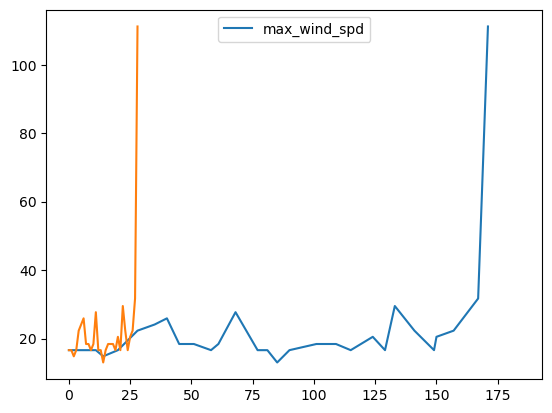

In [191]:
df_max_wind_per_day[df_max_wind_per_day.airport_code == 'MSY'].plot();
# importing package
import matplotlib.pyplot as plt
  
# create data
x = df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'MSY'].to_list()
y = df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'MSY'].to_list()
  
# plot line
plt.plot(y)
plt.show()

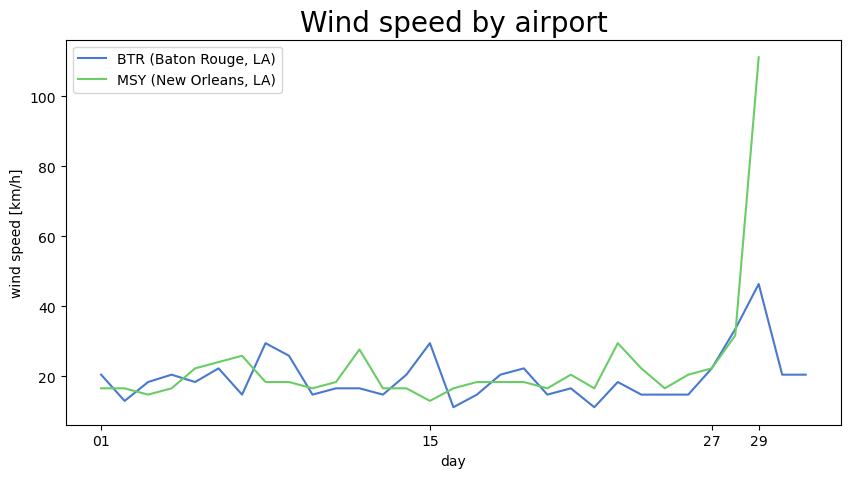

In [230]:
plt.style.use('seaborn-muted')
fig = plt.figure(figsize=(10,5))
plt.title('Wind speed by airport', fontsize=20)

plt.xlabel('day')
plt.ylabel('wind speed [km/h]')

# plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'VPS'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'VPS'], label='VPS (Eglin Air Force Base, FL)')
# plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'PNS'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'PNS'], label='PNS (Pensacola, FL)')
# plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'MOB'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'MOB'], label='MOB (Mobile, AL)')
# plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'GPT'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'GPT'], label='GPT (Gulfport, MS)')
plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'BTR'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'BTR'], label='BTR (Baton Rouge, LA)')
plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'MSY'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'MSY'], label='MSY (New Orleans, LA)')

plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '27', '29'])
plt.legend(loc="upper left")
# plt.xticks([])
plt.grid(False)

plt.show();

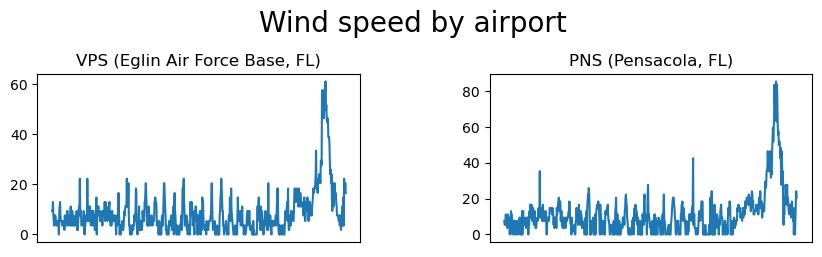

In [198]:
plt.figure(figsize=(10,8))
plt.suptitle('Wind speed by airport', fontsize=20)
plt.subplots_adjust(bottom=0.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3, 2, 1)
plt.plot(vps_hourly_clean['date'], vps_hourly_clean['wind_speed_kph'])
plt.title('VPS (Eglin Air Force Base, FL)')
plt.xticks([])
plt.grid(False)

plt.subplot(3, 2, 2)
plt.plot(pns_hourly_clean['date'], pns_hourly_clean['wind_speed_kph'])
plt.title('PNS (Pensacola, FL)')
plt.xticks([])
plt.grid(False)

plt.subplot(3, 2, 3)  
plt.plot(mob_hourly_clean['date'], mob_hourly_clean['wind_speed_kph'])
plt.title('MOB (Mobile, AL)')
plt.ylabel('wind speed [km/h]')
plt.xticks([])
plt.grid(False)

plt.subplot(3, 2, 4)  
plt.plot(gpt_hourly_clean['date'], gpt_hourly_clean['wind_speed_kph'])
plt.title('GPT (Gulfport, MS)')
plt.ylabel('wind speed [km/h]')
plt.xticks([])
plt.grid(False)

# plt.subplot(3, 2, 5)  
# plt.plot(BTR_weather['date'], BTR_weather['wind_speed_kph'])
# plt.title('BTR (Baton Rouge, LA)')
# plt.xlabel('day')
# plt.xticks([])
# plt.grid(False)

# plt.subplot(3, 2, 6)  
# plt.plot(MSY_weather['date'], MSY_weather['wind_speed_kph'])
# plt.title('MSY (New Orleans, LA)')
# plt.xlabel('day')
# plt.xticks([])
# plt.grid(False);

In [217]:
MSY_origin = df_flights[(df_flights['origin'] == 'MSY')]
MSY_origin_by_date = MSY_origin.groupby('date').sum()

PNS_origin = df_flights[(df_flights['origin'] == 'PNS')]
PNS_origin_by_date = PNS_origin.groupby('date').sum()

MOB_origin = df_flights[(df_flights['origin'] == 'MOB')]
MOB_origin_by_date = MOB_origin.groupby('date').sum()

GPT_origin = df_flights[(df_flights['origin'] == 'GPT')]
GPT_origin_by_date = GPT_origin.groupby('date').sum()

BTR_origin = df_flights[(df_flights['origin'] == 'BTR')]
BTR_origin_by_date = BTR_origin.groupby('date').sum()

VPS_origin = df_flights[(df_flights['origin'] == 'VPS')]
VPS_origin_by_date = VPS_origin.groupby('date').sum()

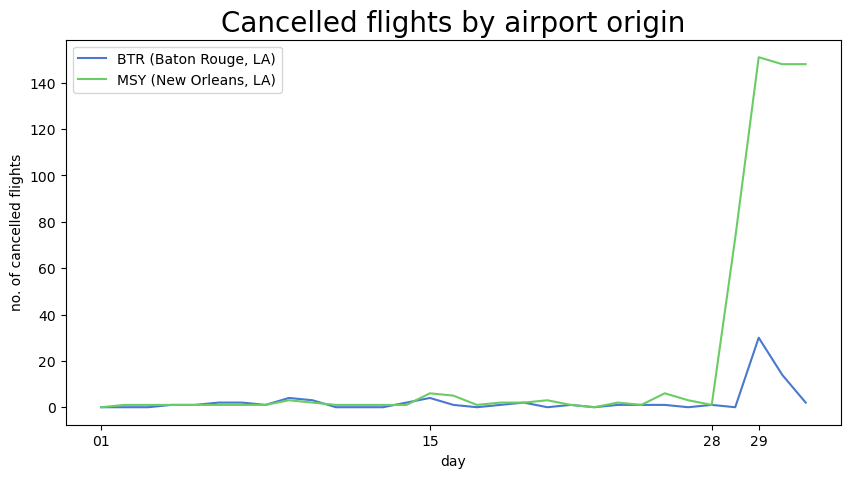

In [231]:
fig = plt.figure(figsize=(10,5))
plt.title('Cancelled flights by airport origin', fontsize=20)

plt.xlabel('day')
plt.ylabel('no. of cancelled flights')

# plt.plot(MSY_origin_by_date['cancelled'], label='VPS (Eglin Air Force Base, FL)')
# plt.plot(PNS_origin_by_date['cancelled'], label='PNS (Pensacola, FL)')
# plt.plot(MOB_origin_by_date['cancelled'], label='MOB (Mobile, AL)')
# plt.plot(GPT_origin_by_date['cancelled'], label='GPT (Gulfport, MS)')
plt.plot(BTR_origin_by_date['cancelled'], label='BTR (Baton Rouge, LA)')
plt.plot(MSY_origin_by_date['cancelled'], label='MSY (New Orleans, LA)')
# plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'BTR'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'BTR'], label='Max Wind Speed - BTR (Baton Rouge, LA)', linestyle=":", color='blue')
# plt.plot(df_max_wind_per_day.date[df_max_wind_per_day.airport_code == 'MSY'], df_max_wind_per_day.max_wind_spd[df_max_wind_per_day.airport_code == 'MSY'], label='Max Wind Speed - MSY (New Orleans, LA)', linestyle=":", color='red')


plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '28', '29'])
plt.legend(loc="upper left")
plt.grid(False)

plt.show();